Kaggle notebook reference: [click here](https://www.kaggle.com/code/startupsci/titanic-data-science-solutions/notebook)

In [2]:
import pandas as pd
import numpy as np
import random as rnd

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
train_df = pd.read_csv('./titanic-dataset/train.csv')
test_df = pd.read_csv('./titanic-dataset/test.csv')
combine = [train_df, test_df]

In [5]:
# columns in train dataset
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [69]:
# printing sample values

"""
Based on values below, 
Can say that  
Numerical continuous columns: Age, Fare  
Numerical discrete columns: SibSp, Parch ?  
Categorical columns: Survived, Sex, Embarked,  
Ordinal: PClass ?  
"""
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,0,1,3,0,2
2,1,3,1,1,0,0,2,1,3
3,1,1,1,2,0,0,3,0,2
4,0,3,0,2,0,0,1,1,6


##### Finding columns having empty or null values

In [7]:
train_df_contains_null_or_blank = []
for column in train_df.columns.values:
    if any([train_df[column].isna().any(), train_df[column].isnull().any(), train_df[column].eq('').any()]):
        train_df_contains_null_or_blank.append(column)


In [8]:
test_df_contains_null_or_blank = []
for column in test_df.columns.values:
    if test_df[column].isna().any() or test_df[column].isnull().any() or test_df[column].eq('').any():
            test_df_contains_null_or_blank.append(column)

In [9]:
print(f"train df contains null or blank in {train_df_contains_null_or_blank}")
print(f"test df contains null or blank in {test_df_contains_null_or_blank}")

train df contains null or blank in ['Age', 'Cabin', 'Embarked']
test df contains null or blank in ['Age', 'Fare', 'Cabin']


##### Finding types for all columns, usefule while conversion

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Finding data insights**

In [12]:
print(train_df['Age'].value_counts())
print(train_df["Age"].describe())

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [13]:
# identifying percent of survival
(train_df["Survived"].value_counts() / train_df["Survived"].count())*100
# insight - out of total sample data, around 38% survived

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [14]:
train_df['Parch'].value_counts(normalize=True) * 100
# insight: around 75% didn't travel with their parents

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64

In [15]:
train_df['SibSp'].value_counts(normalize=True) * 100
# insight: around 68% didn't travel with their siblings

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64

In [16]:
print(f'{round((train_df[((train_df["Parch"] > 0) & (train_df["SibSp"] > 0))].shape[0]/train_df.shape[0]),2)*100}% \
people had both atleast one parent and one sibling on boat')

16.0% people had both atleast one parent and one sibling on boat


In [17]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [18]:
train_df["Sex"].value_counts(normalize=True)*100
# insight: 65% people were male, rest were female

male      64.758698
female    35.241302
Name: Sex, dtype: float64

In [19]:
train_df["Cabin"].isna().value_counts()
# insight: with cabin repeating for several times, meaning several people shared same cabin
# insight: 687 out of total cabin values are null

True     687
False    204
Name: Cabin, dtype: int64

In [20]:
test_df["Cabin"].isna().value_counts()
# insight: 327 out of total cabin values are null

True     327
False     91
Name: Cabin, dtype: int64

Other notes:  
1. Cabin can be dropped due to high null values  
2. PassengerID not a useful feature for survival, and hence can be dropped  
3. Name, not directly contributing to survival, and hence can be dropped

##### Pivoting features for more observations

In [21]:
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)
# insight: People of class 1 were more in survivors

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [22]:
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)
# insight: Female were more in survivors compared to males

,Sex,Survived
0,female,0.742038
1,male,0.188908


##### Using visualization for more insights: Numerical values

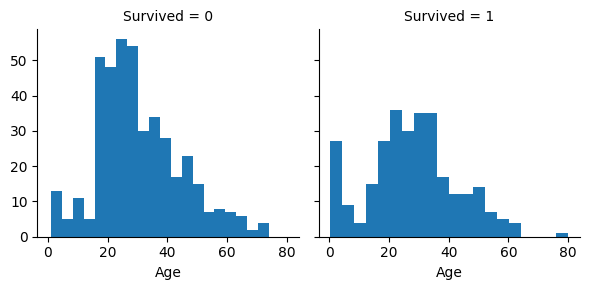

'\n1. People aged around 80 survived\n2. People in age group 20-40 were the maximum in survivors\n3. Children when age <=5 were among survivors\n'

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()
# insight:
"""
1. People aged around 80 survived
2. People in age group 20-40 were the maximum in survivors
3. Children when age <=5 were among survivors
"""

e:\Projects\machine-learning-engineer-roadmap\venv\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


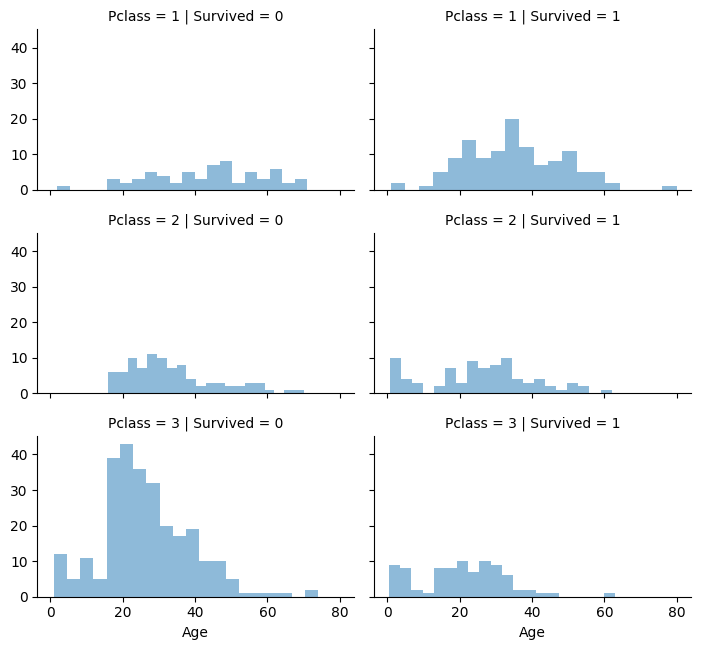

"\n1. pclass=3 had most passengers, but most didn't survive compared to others\n2. pclass=1 had most survivors\n"

In [24]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
plt.show()
# insight:
"""
1. pclass=3 had most passengers, but most didn't survive compared to others
2. pclass=1 had most survivors
"""

##### Using visualization for more insights: Categorical values

e:\Projects\machine-learning-engineer-roadmap\venv\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
e:\Projects\machine-learning-engineer-roadmap\venv\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


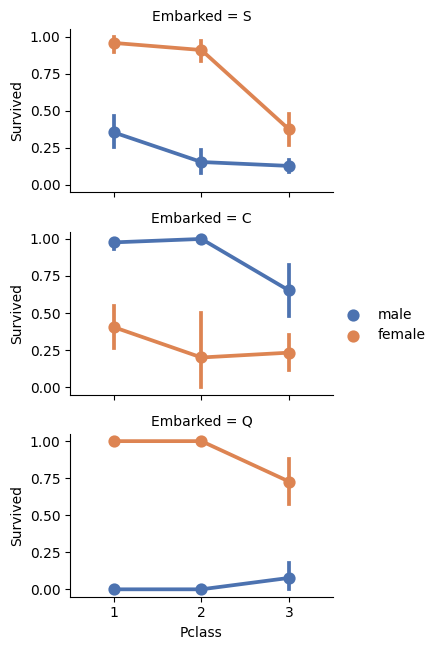

'\n1. More female survivors than male\n2. For embarked=C, more male survivors than female\nSex can have a high correlation factor with survival\n'

In [25]:
# Doing similar analysis as above but for categorical values
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()
plt.show()
# insight:
"""
1. More female survivors than male
2. For embarked=C, more male survivors than female
Sex can have a high correlation factor with survival
"""

##### Using visualization for more insights: Correlating numerical with categorical values

e:\Projects\machine-learning-engineer-roadmap\venv\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
e:\Projects\machine-learning-engineer-roadmap\venv\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


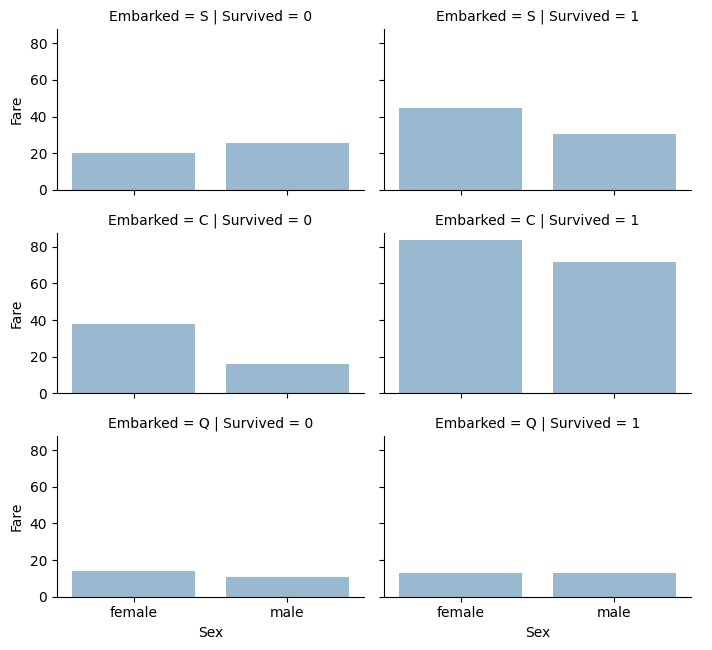

In [26]:
# correlating embarked and survived with fare and sex
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()
plt.show()

##### Data Wrangling

In [27]:
# Dropping not needed columns
train_df = train_df.drop(["Ticket", "Cabin"], axis=1)
test_df = test_df.drop(["Ticket", "Cabin"], axis=1)
combine = [train_df, test_df]

In [28]:
##### Data Wrangling: Extracting title from name
for dataset in combine:
    dataset["Title"] = dataset["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

# why?
pd.crosstab(train_df["Title"], train_df["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [29]:
# Replacing not so frequent values with rare and other such combinations
for dataset in combine:
    dataset["Title"].replace(['Lady', 'Countess','Capt', 'Col',
                              'Don', 'Dr', 'Major', 'Rev', 'Sir', 
                              'Jonkheer', 'Dona'], "Rare", inplace=True)
    dataset["Title"].replace("Mlle", "Miss", inplace=True)
    dataset["Title"].replace("Ms", "Miss", inplace=True)
    dataset["Title"].replace("Mme", "Mrs", inplace=True)
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [30]:
# Converting categorical values into numerical ones using pandas
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)

In [31]:
title_mapping_2 = {1: "Mr", 2: "Miss", 3: "Mrs", 4: "Master",5: "Rare"}
train_df["Title"].value_counts()

1    517
2    185
3    126
4     40
5     23
Name: Title, dtype: int64

In [32]:
# dropping name and passengerID
train_df.drop(['Name', 'PassengerId'], axis=1, inplace=True)
test_df.drop(["Name"], axis=1, inplace=True)

In [33]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [34]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [35]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,5
887,1,1,1,19.0,0,0,30.0000,S,2
888,0,3,1,NaN,1,2,23.4500,S,2
889,1,1,0,26.0,0,0,30.0000,C,1


##### Data Wrangling: Filling missing continuous numerical values

Different ways to do so include:
1. Using standard deviation of available values
2. Guessing missing values using other corelated features

e:\Projects\machine-learning-engineer-roadmap\venv\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


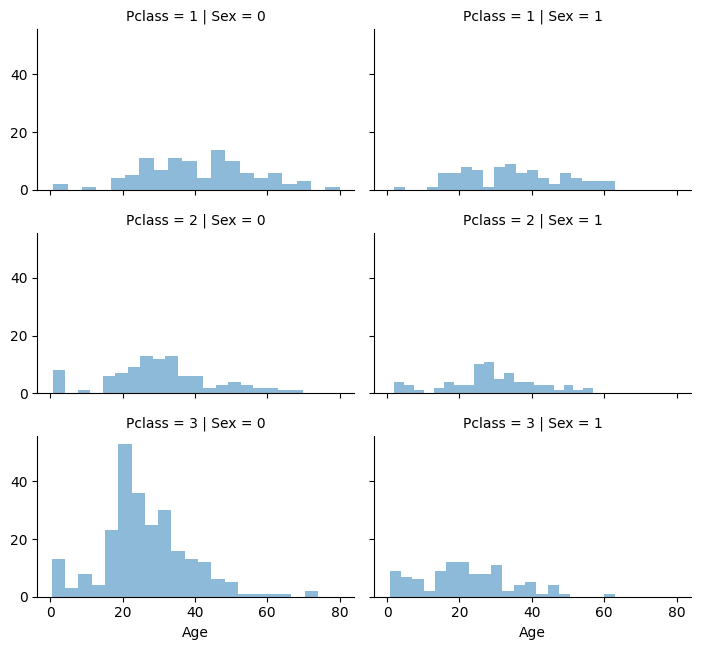

In [36]:
# Using 2nd method, first visualizing to understand the correlation between Age and Sex
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

In [37]:
# with 2 possible values for Sex, and 3 possible values for PClass
guess_ages = np.zeros((2,3))
guess_ages


array([[0., 0., 0.],
       [0., 0., 0.]])

In [38]:
# iterating over sex and pclass to calculate guessed value for Age
for dataset in combine:
    for i in range(0,2): # for sex
        for j in range(0,3): # for pclass
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j] = int(age_guess/0.5 + 0.5)*0.5  # Convert random age float to nearest .5 age
            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]
            
    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()            

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [39]:
train_df[train_df["Age"].isnull()].shape

(0, 9)

In [40]:
# creating age bands
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,22,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,26,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,35,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,35,0,0,8.0500,S,1,"(32.0, 48.0]"


In [41]:
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [42]:
# Converting age into numerical value based on the band they lie in
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']



In [43]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


##### Data Wrangling: Adding features made from other features

In [44]:
for dataset in combine:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
    
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [45]:
# adding isAlone if person was alone
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [46]:
# dropping familysize, parents and siblings as we have isAlone now
for dataset in combine:
    dataset.drop(["Parch", "SibSp", "FamilySize"], axis=1, inplace=True)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [47]:
# combining some numeric features which can have distinct combinations
# Ex - Age and PClass
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df[['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [50]:
# Completing a categorical feature 
# (compared to Age which was numerical, and we used correlating features to complete it)
freq_port = train_df["Embarked"].dropna().mode()[0]

for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].fillna(freq_port)


In [52]:
train_df[["Embarked", "Survived"]].groupby(["Embarked"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [53]:
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].map({"S": 0, "C": 1, "Q": 2}).astype(int)

In [55]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [58]:
test_df[test_df["Fare"].isna()]

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
152,1044,3,0,3,NaN,0,1,1,9


In [59]:
# filling the null value for Fare in test data, since its just 1 value
# using median() here
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

In [60]:
# now we can create bands, just like we did for age
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
# now we can see possible bands, to use in the next step to create the bands
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [64]:
# using the above results as bands in both train_df and test_df
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df.drop(['FareBand'], inplace=True, axis=1) 
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,0,1,3,0,2
2,1,3,1,1,0,0,2,1,3
3,1,1,1,2,0,0,3,0,2
4,0,3,0,2,0,0,1,1,6


In [65]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,0,1,3,0,2
2,1,3,1,1,0,0,2,1,3
3,1,1,1,2,0,0,3,0,2
4,0,3,0,2,0,0,1,1,6


In [66]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,0,2,1,1,6
3,895,3,0,1,0,0,1,1,3
4,896,3,1,1,0,0,3,0,3


This ends the stage of cleaning data to be used in model training

##### Model Training

Some models to consider in such cases, i.e. Classification and Regression  
Logistic Regression  
KNN  
SVM   
Naive Bayes  
Decision Tree  
Random Forest  

In [71]:
X_train = train_df.drop(["Survived"], axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop(["PassengerId"], axis=1).copy()
print(X_train.shape, Y_train.shape, X_test.shape)

(891, 8) (891,) (418, 8)


In [73]:
# generally, first model to try to understand correlation is Logistic Regression
from sklearn.linear_model import LogisticRegression

In [81]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)
accuracy_train_log = round(log_reg.score(X_train, Y_train)*100, 2)
accuracy_train_log


80.36

Identifying the coefficients for all of the features in the trained model's decision

1. Pclass -0.7
2. Sex 2.2
3. Age 0.28
4. Fare 0.0
5. Embarked 0.27
6. Title 0.39
7. IsAlone 0.22
8. Age*Class -0.3


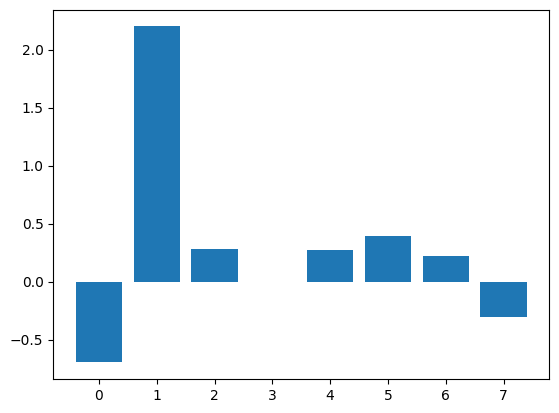

In [108]:
importance = log_reg.coef_[0]
for feature, (index, coefficient) in zip(train_df.columns.to_list()[1:], enumerate(importance)):
    print(f"{index+1}. {feature} {round(coefficient,2)}")


plt.bar([x for x in range(len(importance))], importance)
plt.show()